# Some control cell types

## Oligo

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
root_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir(root_dir / "Oligo")
plot_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/analysis/scenicplus/Oligo/figures/")

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import scanpy as sc
import decoupler as dc
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [3]:
rna_counts = sc.read_mtx("Oligo_rna_matrix.mtx")
rna_counts = rna_counts.T.copy()
cell_meta = pd.read_csv("Oligo_meta_data.tsv", header=0, index_col=0, sep="\t")
gene_names = pd.read_csv("Oligo_gene_names.tsv", header=None, index_col=0, sep="\t")
gene_names.index.name = None
rna_counts.obs = cell_meta
rna_counts.var = gene_names

In [4]:
rna_counts.write("Oligo_rna_matrix.h5ad")

In [5]:
atac_counts = sc.read_mtx("Oligo_atac_matrix.mtx")
atac_counts = atac_counts.T.copy()
cell_meta = pd.read_csv("Oligo_meta_data.tsv", header=0, index_col=0, sep="\t")
region_names = pd.read_csv("Oligo_atac_regions.tsv", header=None, index_col=0, sep="\t")
region_names.index.name = None
atac_counts.obs = cell_meta
atac_counts.var = region_names

In [7]:
atac_counts.write("Oligo_atac_matrix.h5ad")

In [8]:
rna_counts = sc.read_h5ad("Oligo_rna_matrix.h5ad")

In [10]:
rna_counts.obs["Donor_Region"] = \
    rna_counts.obs["PatientID"].astype("str") + "_" + rna_counts.obs["Region"].astype("str")

In [11]:
rna_region_counts = dc.get_pseudobulk(
    adata=rna_counts,
    sample_col="Donor_Region",
    groups_col=None,
    min_cells=0,
    min_counts=0,
    min_prop=0.0,
    min_smpls=0,
    remove_empty=True,
    mode="sum"
)

In [12]:
sc.pp.normalize_total(rna_region_counts, target_sum=1e6)
sc.pp.log1p(rna_region_counts, base=2)

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [13]:
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
rna_region_counts.obs["Region"] = pd.Categorical(
    rna_region_counts.obs["Region"], categories=region_align
)

In [14]:
sorted_index = rna_region_counts.obs.sort_values(by="Region").index

In [15]:
b = rna_region_counts.obs.loc[sorted_index, "Region"].cat.codes.to_list()
data_matrix = rna_region_counts[sorted_index, :].X
corrs = np.zeros(data_matrix.shape[1])
pvalues = np.zeros(data_matrix.shape[1])

for i in range(0, data_matrix.shape[1]):
    a = data_matrix[:, i]
    corr, pvalue = stats.spearmanr(a, b)
    corrs[i] = corr
    pvalues[i] = pvalue

In [16]:
padjusted = stats.false_discovery_control(pvalues, method="bh")

In [18]:
spearman_result = pd.DataFrame({
    "gene": rna_region_counts.var.index.to_list(),
    "corr": corrs,
    "p_value": pvalues,
    "p_adjusted": padjusted,
})

In [21]:
spearman_result[spearman_result["p_adjusted"] < 0.05].shape

(0, 4)

## Micro

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
root_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir(root_dir / "Micro")
plot_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/analysis/scenicplus/Micro/figures/")

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import scanpy as sc
import decoupler as dc
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [3]:
rna_counts = sc.read_mtx("Micro_rna_matrix.mtx")
rna_counts = rna_counts.T.copy()
cell_meta = pd.read_csv("Micro_meta_data.tsv", header=0, index_col=0, sep="\t")
gene_names = pd.read_csv("Micro_gene_names.tsv", header=None, index_col=0, sep="\t")
gene_names.index.name = None
rna_counts.obs = cell_meta
rna_counts.var = gene_names

In [4]:
rna_counts.write("Micro_rna_matrix.h5ad")

In [5]:
atac_counts = sc.read_mtx("Micro_atac_matrix.mtx")
atac_counts = atac_counts.T.copy()
cell_meta = pd.read_csv("Micro_meta_data.tsv", header=0, index_col=0, sep="\t")
region_names = pd.read_csv("Micro_atac_regions.tsv", header=None, index_col=0, sep="\t")
region_names.index.name = None
atac_counts.obs = cell_meta
atac_counts.var = region_names

In [6]:
atac_counts.write("Micro_atac_matrix.h5ad")

In [7]:
rna_counts = sc.read_h5ad("Micro_rna_matrix.h5ad")

In [8]:
rna_counts.obs["Donor_Region"] = \
    rna_counts.obs["PatientID"].astype("str") + "_" + rna_counts.obs["Region"].astype("str")

In [9]:
rna_region_counts = dc.get_pseudobulk(
    adata=rna_counts,
    sample_col="Donor_Region",
    groups_col=None,
    min_cells=0,
    min_counts=0,
    min_prop=0.0,
    min_smpls=0,
    remove_empty=True,
    mode="sum"
)

In [10]:
sc.pp.normalize_total(rna_region_counts, target_sum=1e6)
sc.pp.log1p(rna_region_counts, base=2)

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [11]:
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
rna_region_counts.obs["Region"] = pd.Categorical(
    rna_region_counts.obs["Region"], categories=region_align
)

In [12]:
sorted_index = rna_region_counts.obs.sort_values(by="Region").index

In [13]:
b = rna_region_counts.obs.loc[sorted_index, "Region"].cat.codes.to_list()
data_matrix = rna_region_counts[sorted_index, :].X
corrs = np.zeros(data_matrix.shape[1])
pvalues = np.zeros(data_matrix.shape[1])

for i in range(0, data_matrix.shape[1]):
    a = data_matrix[:, i]
    corr, pvalue = stats.spearmanr(a, b)
    corrs[i] = corr
    pvalues[i] = pvalue

In [15]:
padjusted = stats.false_discovery_control(pvalues, method="bh")

In [16]:
spearman_result = pd.DataFrame({
    "gene": rna_region_counts.var.index.to_list(),
    "corr": corrs,
    "p_value": pvalues,
    "p_adjusted": padjusted,
})

In [17]:
spearman_result[spearman_result["p_adjusted"] < 0.05].shape

(1, 4)

## All control cell types

In [1]:
# let's solve it all at once
import os
from pathlib import Path
import matplotlib.pyplot as plt
root_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir(root_dir / "other_celltypes")

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import scanpy as sc
import decoupler as dc
import numpy as np
import scipy.stats as stats
import seaborn as sns

### Create background list for all cell types

In [3]:
for file in Path("./").glob("*rna_matrix.mtx"):
    celltype = str(file).split("_rna_matrix", 1)[0]
    print(celltype)

    rna_counts = sc.read_h5ad("{}_rna_matrix.h5ad".format(celltype))
    if celltype in ["L4_IT","SST_CHODL", "L5_ET"]:
        rna_counts = rna_counts.raw.to_adata()

    rna_counts_filtered = rna_counts[:, rna_counts.X.sum(axis=0) > 0]
    with open("corr_genes/{}_full_list.tsv".format(celltype), "w") as fout:
        for gene in rna_counts_filtered.var.index.to_list():
            fout.write("{}\n".format(gene))

Micro
L5_IT
L6_IT
L6_IT_Car3
LAMP5_LHX6
OPC
L6B
L6_CT
VLMC
Oligo
PAX6
Chandelier
L2_3_IT
SST_CHODL
Astro
SST
LAMP5
PVALB
Endo
SNCG
L5_ET
VIP
L5_6_NP
L4_IT


### rna and atac

In [3]:
celltype_names = []
positive_nbr = []
negative_nbr = []
for file in Path("./").glob("*rna_matrix.mtx"):
    celltype = str(file).split("_rna_matrix", 1)[0]
    print(celltype)
    celltype_names.append(celltype)
    
    # rna_counts = sc.read_mtx("{}_rna_matrix.mtx".format(celltype))
    # rna_counts = rna_counts.T.copy()
    # cell_meta = pd.read_csv("{}_meta_data.tsv".format(celltype), header=0, index_col=0, sep="\t")
    # gene_names = pd.read_csv("{}_gene_names.tsv".format(celltype), header=None, index_col=0, sep="\t")
    # gene_names.index.name = None
    # rna_counts.obs = cell_meta
    # rna_counts.var = gene_names
    # rna_counts.write("{}_rna_matrix.h5ad".format(celltype))

    rna_counts = sc.read_h5ad("{}_rna_matrix.h5ad".format(celltype))
    if celltype in ["L4_IT","SST_CHODL", "L5_ET"]:
        rna_counts = rna_counts.raw.to_adata()
    rna_counts.obs["Donor_Region"] = \
        rna_counts.obs["PatientID"].astype("str") + "_" + rna_counts.obs["Region"].astype("str")
    rna_region_counts = dc.get_pseudobulk(
        adata=rna_counts,
        sample_col="Donor_Region",
        groups_col=None,
        min_cells=0,
        min_counts=0,
        min_prop=0.0,
        min_smpls=0,
        remove_empty=True,
        mode="sum"
    )
    sc.pp.normalize_total(rna_region_counts, target_sum=1e6)
    sc.pp.log1p(rna_region_counts, base=2)
    region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
    rna_region_counts.obs["Region"] = pd.Categorical(
        rna_region_counts.obs["Region"], categories=region_align
    )
    sorted_index = rna_region_counts.obs.sort_values(by="Region").index
    b = rna_region_counts.obs.loc[sorted_index, "Region"].cat.codes.to_list()
    data_matrix = rna_region_counts[sorted_index, :].X
    corrs = np.zeros(data_matrix.shape[1])
    pvalues = np.zeros(data_matrix.shape[1])
    
    for i in range(0, data_matrix.shape[1]):
        a = data_matrix[:, i]
        corr, pvalue = stats.spearmanr(a, b)
        corrs[i] = corr
        pvalues[i] = pvalue
    padjusted = stats.false_discovery_control(pvalues, method="bh")
    spearman_result = pd.DataFrame({
        "gene": rna_region_counts.var.index.to_list(),
        "corr": corrs,
        "p_value": pvalues,
        "p_adjusted": padjusted,
    })
    print("{}\tpositive: {}".format(
        celltype, 
        spearman_result[(spearman_result["p_adjusted"] < 0.01) & (spearman_result["corr"] > 0.0)].shape))
    print("{}\tnegative: {}".format(
        celltype, 
        spearman_result[(spearman_result["p_adjusted"] < 0.01) & (spearman_result["corr"] < 0.0)].shape))
    positive_nbr.append(
        spearman_result[(spearman_result["p_adjusted"] < 0.01) & (spearman_result["corr"] > 0.0)].shape[0]
    )
    negative_nbr.append(
        spearman_result[(spearman_result["p_adjusted"] < 0.01) & (spearman_result["corr"] < 0.0)].shape[0]
    )
    positive_genes = spearman_result[
        (spearman_result["p_adjusted"] < 0.01) & (spearman_result["corr"] > 0.0)]["gene"].to_list()
    with open("corr_genes/{}_positive.tsv".format(celltype), "w") as fout:
        for gene in positive_genes:
            fout.write("{}\n".format(gene))
    negative_genes = spearman_result[
        (spearman_result["p_adjusted"] < 0.01) & (spearman_result["corr"] < 0.0)]["gene"].to_list()
    with open("corr_genes/{}_negative.tsv".format(celltype), "w") as fout:
        for gene in negative_genes:
            fout.write("{}\n".format(gene))

Micro


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Micro	positive: (1, 4)
Micro	negative: (0, 4)
L5_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L5_IT	positive: (333, 4)
L5_IT	negative: (344, 4)
L6_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6_IT	positive: (112, 4)
L6_IT	negative: (116, 4)
L6_IT_Car3


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6_IT_Car3	positive: (226, 4)
L6_IT_Car3	negative: (143, 4)
LAMP5_LHX6


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


LAMP5_LHX6	positive: (29, 4)
LAMP5_LHX6	negative: (33, 4)
OPC


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


OPC	positive: (0, 4)
OPC	negative: (3, 4)
L6B


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6B	positive: (41, 4)
L6B	negative: (43, 4)
L6_CT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6_CT	positive: (102, 4)
L6_CT	negative: (209, 4)
VLMC


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


VLMC	positive: (0, 4)
VLMC	negative: (0, 4)
Oligo


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Oligo	positive: (0, 4)
Oligo	negative: (0, 4)
PAX6


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


PAX6	positive: (10, 4)
PAX6	negative: (15, 4)
Chandelier


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Chandelier	positive: (19, 4)
Chandelier	negative: (29, 4)
L2_3_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L2_3_IT	positive: (937, 4)
L2_3_IT	negative: (723, 4)
SST_CHODL


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


SST_CHODL	positive: (0, 4)
SST_CHODL	negative: (0, 4)
Astro


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Astro	positive: (3, 4)
Astro	negative: (4, 4)
SST


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


SST	positive: (144, 4)
SST	negative: (231, 4)
LAMP5


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


LAMP5	positive: (0, 4)
LAMP5	negative: (12, 4)
PVALB


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


PVALB	positive: (38, 4)
PVALB	negative: (68, 4)
Endo


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Endo	positive: (0, 4)
Endo	negative: (0, 4)
SNCG


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


SNCG	positive: (4, 4)
SNCG	negative: (5, 4)
L5_ET


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L5_ET	positive: (412, 4)
L5_ET	negative: (364, 4)
VIP


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


VIP	positive: (181, 4)
VIP	negative: (234, 4)
L5_6_NP


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L5_6_NP	positive: (111, 4)
L5_6_NP	negative: (230, 4)
L4_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L4_IT	positive: (805, 4)
L4_IT	negative: (1037, 4)


In [15]:
plot_table_wide = pd.DataFrame({
    "celltype": celltype_names,
    "positive": positive_nbr,
    "negative": negative_nbr
})

In [16]:
plot_table_wide.to_csv(
    "summary_tables/rostral_caudal_corr_genes_all_celltypes.tsv",
    header=True, index=False, sep="\t"
)

In [21]:
plot_table_wide = pd.read_csv(
    "summary_tables/rostral_caudal_corr_genes_all_celltypes.tsv",
    header=0, sep="\t"
)

In [22]:
plot_table_wide["total"] = plot_table_wide["positive"] + plot_table_wide["negative"]
sorted_index = plot_table_wide.sort_values("total", ascending=False)["celltype"]
plot_table_wide["celltype"] = pd.Categorical(plot_table_wide["celltype"], categories=sorted_index)
plot_table_long = pd.melt(
    plot_table_wide, 
    id_vars=["celltype"], 
    value_vars=["positive", "negative"],
    var_name="direction",
    value_name="corr_score"
)

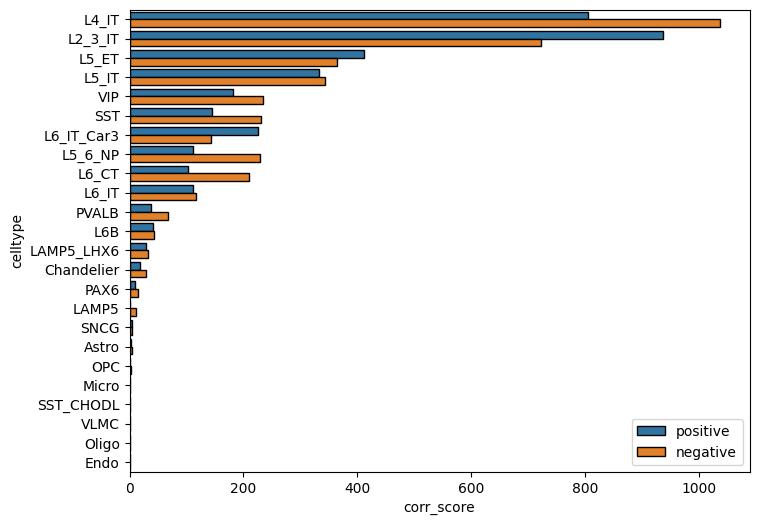

In [37]:
plot_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/analysis/scenicplus/L4_IT/figures/")
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8),
fig.set_figheight(6)
sns.barplot(
    plot_table_long, 
    y="celltype", 
    x="corr_score", 
    hue="direction", 
    ax=ax, 
    linewidth=1,
    edgecolor="black"
)
plt.legend(loc="lower right")
fig.savefig(plot_dir / "rostral_caudal_all_corr_genes_padj_1e-2.png", dpi=300, format="png")

In [4]:
celltype_names = []
positive_nbr = []
negative_nbr = []
for file in Path("./").glob("*atac_matrix.mtx"):
    celltype = str(file).split("_atac_matrix", 1)[0]
    print(celltype)
    celltype_names.append(celltype)

    if not Path("./{}_atac_matrix.h5ad".format(celltype)).exists():
        atac_counts = sc.read_mtx("{}_atac_matrix.mtx".format(celltype))
        atac_counts = atac_counts.T.copy()
        cell_meta = pd.read_csv("{}_meta_data.tsv".format(celltype), header=0, index_col=0, sep="\t")
        region_names = pd.read_csv("{}_atac_regions.tsv".format(celltype), header=None, index_col=0, sep="\t")
        region_names.index.name = None
        atac_counts.obs = cell_meta
        atac_counts.var = region_names
        atac_counts.write("{}_atac_matrix.h5ad".format(celltype))

    atac_counts = sc.read_h5ad("{}_atac_matrix.h5ad".format(celltype))
    atac_counts.obs["Donor_Region"] = \
        atac_counts.obs["PatientID"].astype("str") + "_" + atac_counts.obs["Region"].astype("str")
    atac_region_counts = dc.get_pseudobulk(
        adata=atac_counts,
        sample_col="Donor_Region",
        groups_col=None,
        min_cells=0,
        min_counts=0,
        min_prop=0.0,
        min_smpls=0,
        remove_empty=True,
        mode="sum"
    )
    sc.pp.normalize_total(atac_region_counts, target_sum=1e6)
    sc.pp.log1p(atac_region_counts, base=2)
    region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
    atac_region_counts.obs["Region"] = pd.Categorical(
        atac_region_counts.obs["Region"], categories=region_align
    )
    sorted_index = atac_region_counts.obs.sort_values(by="Region").index
    b = atac_region_counts.obs.loc[sorted_index, "Region"].cat.codes.to_list()
    data_matrix = atac_region_counts[sorted_index, :].X
    corrs = np.zeros(data_matrix.shape[1])
    pvalues = np.zeros(data_matrix.shape[1])
    
    for i in range(0, data_matrix.shape[1]):
        a = data_matrix[:, i]
        corr, pvalue = stats.spearmanr(a, b)
        corrs[i] = corr
        pvalues[i] = pvalue
    padjusted = stats.false_discovery_control(pvalues, method="bh")
    spearman_result = pd.DataFrame({
        "region": atac_region_counts.var.index.to_list(),
        "corr": corrs,
        "p_value": pvalues,
        "p_adjusted": padjusted,
    })
    print("{}\tpositive: {}".format(
        celltype, 
        spearman_result[(spearman_result["p_adjusted"] < 0.01) & (spearman_result["corr"] > 0.0)].shape))
    print("{}\tnegative: {}".format(
        celltype, 
        spearman_result[(spearman_result["p_adjusted"] < 0.01) & (spearman_result["corr"] < 0.0)].shape))
    positive_nbr.append(
        spearman_result[(spearman_result["p_adjusted"] < 0.01) & (spearman_result["corr"] > 0.0)].shape[0]
    )
    negative_nbr.append(
        spearman_result[(spearman_result["p_adjusted"] < 0.01) & (spearman_result["corr"] < 0.0)].shape[0]
    )
    positive_regions = spearman_result[
        (spearman_result["p_adjusted"] < 0.01) & (spearman_result["corr"] > 0.0)]["region"].to_list()
    with open("corr_regions/{}_positive.tsv".format(celltype), "w") as fout:
        for region in positive_regions:
            fout.write("{}\n".format(region))
    negative_regions = spearman_result[
        (spearman_result["p_adjusted"] < 0.01) & (spearman_result["corr"] < 0.0)]["region"].to_list()
    with open("corr_regions/{}_negative.tsv".format(celltype), "w") as fout:
        for region in negative_regions:
            fout.write("{}\n".format(region))

L4_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L4_IT	positive: (176, 4)
L4_IT	negative: (97, 4)
L2_3_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L2_3_IT	positive: (5574, 4)
L2_3_IT	negative: (6731, 4)
VLMC


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


VLMC	positive: (0, 4)
VLMC	negative: (0, 4)
Oligo


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Oligo	positive: (0, 4)
Oligo	negative: (0, 4)
L5_6_NP


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L5_6_NP	positive: (0, 4)
L5_6_NP	negative: (0, 4)
SST


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


SST	positive: (0, 4)
SST	negative: (0, 4)
VIP


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


VIP	positive: (0, 4)
VIP	negative: (0, 4)
OPC


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


OPC	positive: (0, 4)
OPC	negative: (0, 4)
Astro


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Astro	positive: (4, 4)
Astro	negative: (1, 4)
L6_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6_IT	positive: (0, 4)
L6_IT	negative: (0, 4)
SST_CHODL


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


SST_CHODL	positive: (0, 4)
SST_CHODL	negative: (0, 4)
LAMP5_LHX6


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


LAMP5_LHX6	positive: (0, 4)
LAMP5_LHX6	negative: (0, 4)
L5_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L5_IT	positive: (4, 4)
L5_IT	negative: (5, 4)
PVALB


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


PVALB	positive: (0, 4)
PVALB	negative: (0, 4)
Endo


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Endo	positive: (0, 4)
Endo	negative: (0, 4)
Chandelier


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Chandelier	positive: (0, 4)
Chandelier	negative: (0, 4)
L6_CT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6_CT	positive: (6, 4)
L6_CT	negative: (4, 4)
L5_ET


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L5_ET	positive: (0, 4)
L5_ET	negative: (1, 4)
SNCG


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


SNCG	positive: (0, 4)
SNCG	negative: (0, 4)
PAX6


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


PAX6	positive: (0, 4)
PAX6	negative: (0, 4)
Micro


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Micro	positive: (0, 4)
Micro	negative: (0, 4)
L6_IT_Car3


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6_IT_Car3	positive: (0, 4)
L6_IT_Car3	negative: (0, 4)
LAMP5


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


LAMP5	positive: (0, 4)
LAMP5	negative: (1, 4)
L6B


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6B	positive: (0, 4)
L6B	negative: (0, 4)


In [5]:
plot_table_wide = pd.DataFrame({
    "celltype": celltype_names,
    "positive": positive_nbr,
    "negative": negative_nbr
})

In [6]:
plot_table_wide.to_csv(
    "summary_tables/rostral_caudal_corr_peaks_all_celltypes.tsv",
    header=True, index=False, sep="\t"
)

In [7]:
plot_table_wide = pd.read_csv(
    "summary_tables/rostral_caudal_corr_peaks_all_celltypes.tsv",
    header=0, sep="\t"
)

In [8]:
plot_table_wide["total"] = plot_table_wide["positive"] + plot_table_wide["negative"]
sorted_index = plot_table_wide.sort_values("total", ascending=False)["celltype"]
plot_table_wide["celltype"] = pd.Categorical(plot_table_wide["celltype"], categories=sorted_index)
plot_table_long = pd.melt(
    plot_table_wide, 
    id_vars=["celltype"], 
    value_vars=["positive", "negative"],
    var_name="direction",
    value_name="corr_score"
)

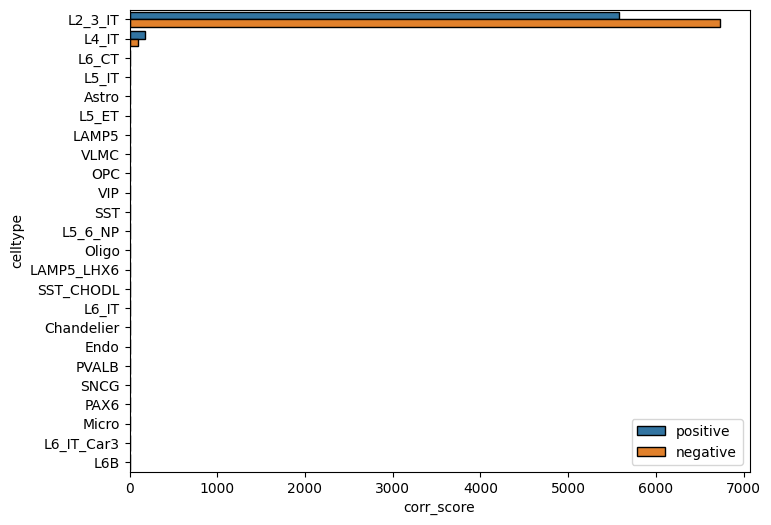

In [9]:
plot_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/analysis/scenicplus/L4_IT/figures/")
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8),
fig.set_figheight(6)
sns.barplot(
    plot_table_long, 
    y="celltype", 
    x="corr_score", 
    hue="direction", 
    ax=ax, 
    linewidth=1,
    edgecolor="black"
)
plt.legend(loc="lower right")
fig.savefig(plot_dir / "rostral_caudal_all_corr_peaks_padj_1e-2.png", dpi=300, format="png")

## Create upset plot to summarize correlated genes in different cell types

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
root_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir(root_dir / "other_celltypes")
plot_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/analysis/scenicplus/L4_IT/figures/")

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import scanpy as sc
import decoupler as dc
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [3]:
import itertools

In [4]:
def generate_all_combinations_and_counts(lists):
    combination_codes = []
    number_instances = []

    N = len(lists)
    for k in range(2, N+1):
        for combinations in itertools.combinations(range(N), k):
            combination_codes.append(combinations)
            intersected = set(lists[combinations[0]])
            for idx in combinations[1:]:
                intersected &= set(lists[idx])
            number_instances.append(len(intersected))

    return (combination_codes, number_instances)

In [5]:
celltype_order = []
lists = []
for file in Path("./corr_genes/").glob("*_positive.tsv"):
    celltype = file.name.split("_positive.tsv")[0]
    if file.stat().st_size <= 0:
        continue
    celltype_order.append(celltype)
    curr_df = pd.read_csv(file, header=None, sep="\t")
    lists.append(curr_df[0].to_list())
lists_len = [len(li) for li in lists]
lists_len_sorted = np.sort(lists_len)[::-1]
lists_len_sorted_index = np.argsort(lists_len)[::-1]
celltype_sorted = [celltype_order[ii] for ii in lists_len_sorted_index]
lists_sorted = [lists[ii] for ii in lists_len_sorted_index]

In [6]:
combination_codes, number_instances = generate_all_combinations_and_counts(lists_sorted)

In [7]:
number_instances_sorted = np.sort(number_instances)[::-1]
number_instances_sorted_index = np.argsort(number_instances)[::-1]
combination_codes_sorted = [combination_codes[ii] for ii in number_instances_sorted_index]

In [8]:
df_1 = pd.DataFrame({
    "celltype": celltype_sorted,
    "count": lists_len_sorted
})

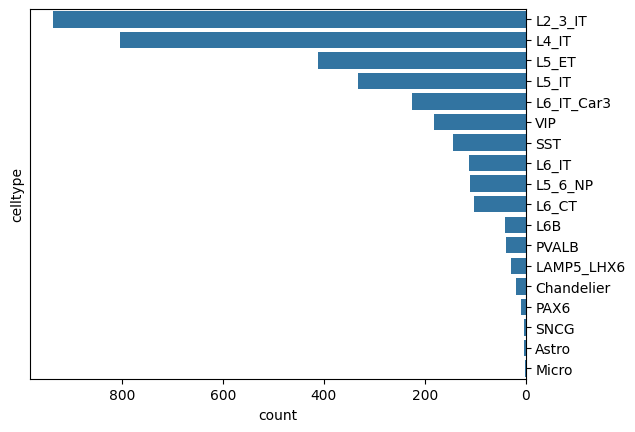

In [9]:
fig, ax = plt.subplots(1, 1)
sns.barplot(
    df_1,
    x="count",
    y="celltype",
    orient="h",
    ax=ax
)
ax.invert_xaxis()
ax.yaxis.tick_right()

In [10]:
df_2 = pd.DataFrame({
    "count": number_instances_sorted[0:20]
})
df_2.reset_index(inplace=True)

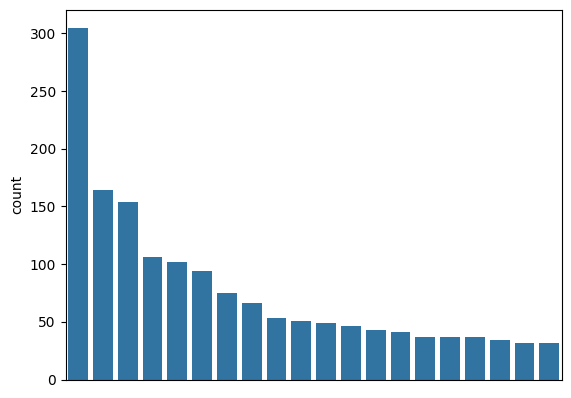

In [11]:
fig, ax = plt.subplots(1, 1)
sns.barplot(
    df_2,
    x="index",
    y="count"
)
ax.xaxis.set_ticks([]);
ax.set_xticklabels([]);
ax.set_xlabel("");

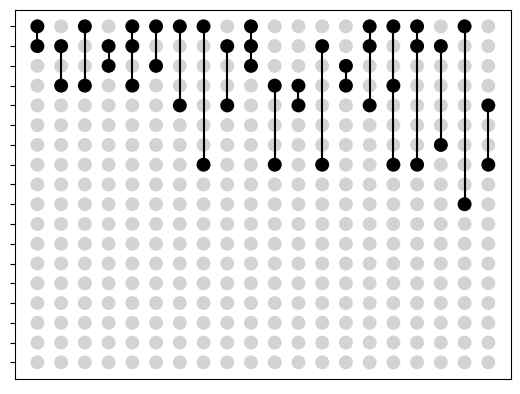

In [12]:
N = 20
K = len(celltype_sorted)
fig, ax = plt.subplots(1, 1)
for i in range(N):
    ax.scatter([i] * (K), np.arange(K), color="lightgrey", s=100, edgecolor="none")
points_by_x = {x: [] for x in range(N+1)}
for i, tuple_vals in enumerate(combination_codes_sorted[0:N]):
    ax.scatter([i] * len(tuple_vals), tuple_vals, color="black", s=100, edgecolor="none")
    for x in tuple_vals:
        points_by_x[i].append(x)
for x, yvals in points_by_x.items():
    ax.plot([x] * len(yvals), yvals, color="black", lw=1.5)
    
ax.xaxis.set_ticks([]);
ax.set_xticklabels([]);
ax.set_xlabel("");
ax.yaxis.set_ticks(np.arange(0, K));
ax.invert_yaxis()
ax.set_yticklabels([]);

In [13]:
import matplotlib.gridspec as gridspec

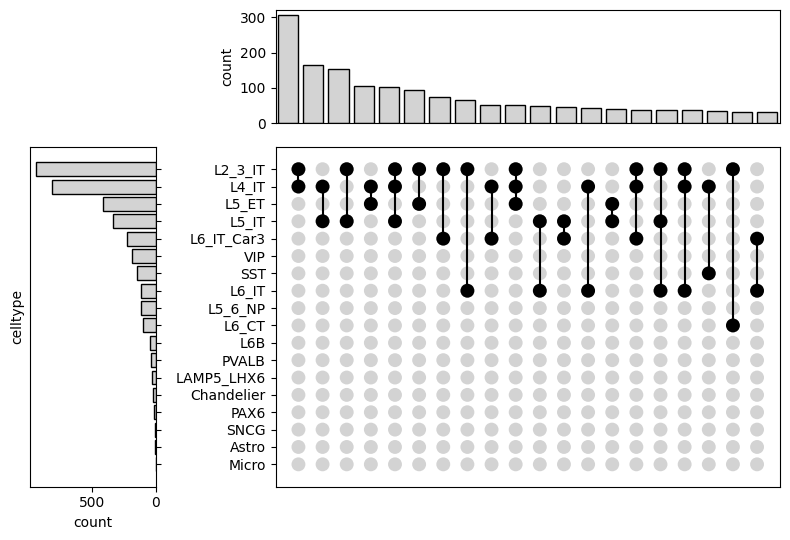

In [14]:
N = 20
K = len(celltype_sorted)
fig = plt.figure(figsize=(8, 5.5))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 3], width_ratios=[1, 4])

ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1], sharey=ax1)

df_1 = pd.DataFrame({
    "celltype": celltype_sorted,
    "count": lists_len_sorted
})
sns.barplot(
    df_1,
    x="count",
    y="celltype",
    orient="h",
    ax=ax1,
    edgecolor="black",
    facecolor="lightgrey"
)
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.tick_params(labelright=False);

df_2 = pd.DataFrame({
    "count": number_instances_sorted[0:N]
})
df_2.reset_index(inplace=True)
sns.barplot(
    df_2,
    x="index",
    y="count",
    ax=ax2,
    edgecolor="black",
    facecolor="lightgrey"
)
ax2.xaxis.set_ticks([]);
ax2.set_xticklabels([]);
ax2.set_xlabel("");

for i in range(N):
    ax3.scatter([i] * (K), np.arange(K), color="lightgrey", s=100, edgecolor="none")
points_by_x = {x: [] for x in range(N+1)}
for i, tuple_vals in enumerate(combination_codes_sorted[0:N]):
    ax3.scatter([i] * len(tuple_vals), tuple_vals, color="black", s=100, edgecolor="none")
    for x in tuple_vals:
        points_by_x[i].append(x)
for x, yvals in points_by_x.items():
    ax3.plot([x] * len(yvals), yvals, color="black", lw=1.5)
    
ax3.xaxis.set_ticks([]);
ax3.set_xticklabels([]);
ax3.set_xlabel("");
# ax3.yaxis.set_ticks(np.arange(0, K));
# ax3.invert_yaxis()
plt.tight_layout()

## Jorstad approach (corr > 0.7; corr > 0.5 with A24 and V1C removed)

In [1]:
# let's solve it all at once
import os
from pathlib import Path
import matplotlib.pyplot as plt
root_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir(root_dir / "other_celltypes")

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import scanpy as sc
import decoupler as dc
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [3]:
celltype_names = []
positive_nbr = []
negative_nbr = []
for file in Path("./").glob("*rna_matrix.mtx"):
    celltype = str(file).split("_rna_matrix", 1)[0]
    print(celltype)
    celltype_names.append(celltype)
    
    # rna_counts = sc.read_mtx("{}_rna_matrix.mtx".format(celltype))
    # rna_counts = rna_counts.T.copy()
    # cell_meta = pd.read_csv("{}_meta_data.tsv".format(celltype), header=0, index_col=0, sep="\t")
    # gene_names = pd.read_csv("{}_gene_names.tsv".format(celltype), header=None, index_col=0, sep="\t")
    # gene_names.index.name = None
    # rna_counts.obs = cell_meta
    # rna_counts.var = gene_names
    # rna_counts.write("{}_rna_matrix.h5ad".format(celltype))

    rna_counts = sc.read_h5ad("{}_rna_matrix.h5ad".format(celltype))
    if celltype in ["L4_IT","SST_CHODL", "L5_ET"]:
        rna_counts = rna_counts.raw.to_adata()
    rna_counts.obs["Donor_Region"] = \
        rna_counts.obs["PatientID"].astype("str") + "_" + rna_counts.obs["Region"].astype("str")
    rna_region_counts = dc.get_pseudobulk(
        adata=rna_counts,
        sample_col="Donor_Region",
        groups_col=None,
        min_cells=0,
        min_counts=0,
        min_prop=0.0,
        min_smpls=0,
        remove_empty=True,
        mode="sum"
    )
    sc.pp.normalize_total(rna_region_counts, target_sum=1e6)
    sc.pp.log1p(rna_region_counts, base=2)
    
    region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
    rna_region_counts.obs["Region"] = pd.Categorical(
        rna_region_counts.obs["Region"], categories=region_align
    )
    sorted_index = rna_region_counts.obs.sort_values(by="Region").index
    b = rna_region_counts.obs.loc[sorted_index, "Region"].cat.codes.to_list()
    data_matrix = rna_region_counts[sorted_index, :].X
    corrs = np.zeros(data_matrix.shape[1])
    pvalues = np.zeros(data_matrix.shape[1])
    
    for i in range(0, data_matrix.shape[1]):
        a = data_matrix[:, i]
        corr, pvalue = stats.spearmanr(a, b)
        corrs[i] = corr
        pvalues[i] = pvalue
    padjusted = stats.false_discovery_control(pvalues, method="bh")
    spearman_result = pd.DataFrame({
        "gene": rna_region_counts.var.index.to_list(),
        "corr": corrs,
        "p_value": pvalues,
        "p_adjusted": padjusted,
    })

    rna_region_counts_mid = rna_region_counts[
        ~(rna_region_counts.obs["Region"].isin(["A24", "V1C"]))].copy()
    non_zero_genes = np.any(rna_region_counts_mid.X != 0, axis=0)
    rna_region_counts_mid = rna_region_counts_mid[:, non_zero_genes].copy()
    region_align_mid = ["A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG"]
    rna_region_counts_mid.obs["Region"] = pd.Categorical(
        rna_region_counts_mid.obs["Region"], categories=region_align_mid
    )
    sorted_index = rna_region_counts_mid.obs.sort_values(by="Region").index
    b = rna_region_counts_mid.obs.loc[sorted_index, "Region"].cat.codes.to_list()
    data_matrix = rna_region_counts_mid[sorted_index, :].X
    corrs = np.zeros(data_matrix.shape[1])
    pvalues = np.zeros(data_matrix.shape[1])
    
    for i in range(0, data_matrix.shape[1]):
        a = data_matrix[:, i]
        corr, pvalue = stats.spearmanr(a, b)
        corrs[i] = corr
        pvalues[i] = pvalue
    padjusted = stats.false_discovery_control(pvalues, method="bh")
    spearman_result_mid = pd.DataFrame({
        "gene": rna_region_counts_mid.var.index.to_list(),
        "corr": corrs,
        "p_value": pvalues,
        "p_adjusted": padjusted,
    })

    # positive
    corr_set1 = spearman_result[spearman_result["corr"] > 0.7]["gene"].to_list()
    corr_set2 = spearman_result_mid[spearman_result_mid["corr"] > 0.5]["gene"].to_list()
    corr_set = list(set(corr_set1) & set(corr_set2))
    positive_nbr.append(len(corr_set))
    with open("corr_genes_jorstad/{}_positive.tsv".format(celltype), "w") as fout:
        for gene in corr_set:
            fout.write("{}\n".format(gene))
    
    corr_set1 = spearman_result[spearman_result["corr"] < -0.7]["gene"].to_list()
    corr_set2 = spearman_result_mid[spearman_result_mid["corr"] < -0.5]["gene"].to_list()
    corr_set = list(set(corr_set1) & set(corr_set2))
    negative_nbr.append(len(corr_set))
    with open("corr_genes_jorstad/{}_negative.tsv".format(celltype), "w") as fout:
        for gene in corr_set:
            fout.write("{}\n".format(gene))

Micro


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L5_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6_IT_Car3


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


LAMP5_LHX6


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


OPC


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6B


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6_CT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


VLMC


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Oligo


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


PAX6


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Chandelier


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L2_3_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


SST_CHODL


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Astro


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


SST


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


LAMP5


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


PVALB


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Endo


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


SNCG


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L5_ET


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


VIP


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L5_6_NP


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L4_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [4]:
plot_table_wide = pd.DataFrame({
    "celltype": celltype_names,
    "positive": positive_nbr,
    "negative": negative_nbr
})

In [5]:
plot_table_wide.to_csv(
    "summary_tables/rostral_caudal_corr_genes_all_celltypes_jorstad.tsv",
    header=True, index=False, sep="\t"
)

In [6]:
plot_table_wide = pd.read_csv(
    "summary_tables/rostral_caudal_corr_genes_all_celltypes_jorstad.tsv",
    header=0, sep="\t"
)

In [7]:
plot_table_wide["total"] = plot_table_wide["positive"] + plot_table_wide["negative"]
sorted_index = plot_table_wide.sort_values("total", ascending=False)["celltype"]
plot_table_wide["celltype"] = pd.Categorical(plot_table_wide["celltype"], categories=sorted_index)
plot_table_long = pd.melt(
    plot_table_wide, 
    id_vars=["celltype"], 
    value_vars=["positive", "negative"],
    var_name="direction",
    value_name="corr_score"
)

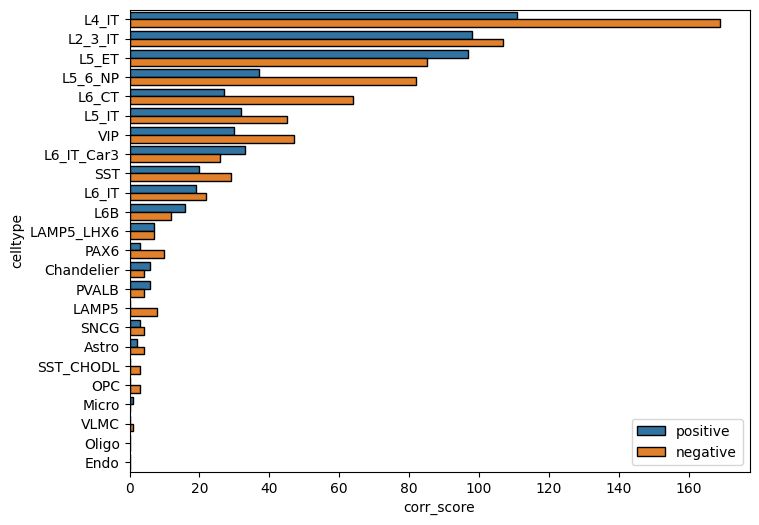

In [8]:
plot_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/analysis/scenicplus/L4_IT/figures/")
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8),
fig.set_figheight(6)
sns.barplot(
    plot_table_long, 
    y="celltype", 
    x="corr_score", 
    hue="direction", 
    ax=ax, 
    linewidth=1,
    edgecolor="black"
)
plt.legend(loc="lower right")
fig.savefig(plot_dir / "rostral_caudal_all_corr_genes_jorstad.png", dpi=300, format="png")

## Check Jorstad RC corr genes

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
root_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir(root_dir / "other_celltypes")
plot_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/analysis/scenicplus/L4_IT/figures/")

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import scanpy as sc
import decoupler as dc
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [3]:
jorstad_corr_genes = pd.read_csv("jorstad_rc_corr_genes.csv", sep=",", header=0)

In [4]:
jorstad_corr_genes["subclass"] = \
    jorstad_corr_genes["subclass"].str.replace("[/ ]", "_", regex=True)

In [5]:
from matplotlib_venn import venn2, venn2_circles

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


<AxesSubplot: >

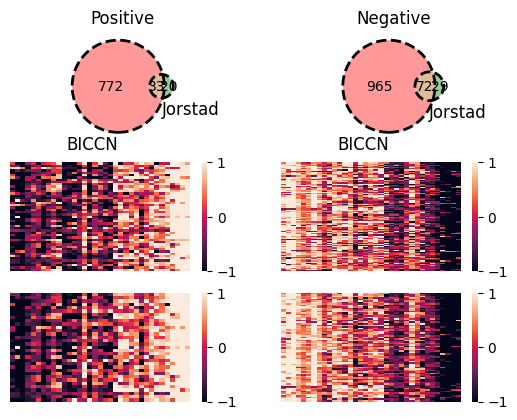

In [6]:
subclass = "L4_IT"
subclass_column = "L4_IT"
corr_positive_list = pd.read_csv(
    "corr_genes/{}_positive.tsv".format(subclass), sep="\t", header=None)[0].to_list()
jorstad_positive_list = jorstad_corr_genes[
    (jorstad_corr_genes["subclass"] == subclass_column) & (jorstad_corr_genes["cor_ap"] > 0)
]["gene"].to_list()
corr_negative_list = pd.read_csv(
    "corr_genes/{}_negative.tsv".format(subclass), sep="\t", header=None)[0].to_list()
jorstad_negative_list = jorstad_corr_genes[
    (jorstad_corr_genes["subclass"] == subclass_column) & (jorstad_corr_genes["cor_ap"] < 0)
]["gene"].to_list()

fig, axs = plt.subplots(3, 2)
venn2(
    (set(corr_positive_list), set(jorstad_positive_list)),
    set_labels=["BICCN", "Jorstad"],
    ax=axs[0, 0]
)
venn2_circles(
    (set(corr_positive_list), set(jorstad_positive_list)),
    linestyle="dashed",
    linewidth=2,
    color="black",
    ax=axs[0, 0]
)
axs[0, 0].set_title("Positive");
venn2(
    (set(corr_negative_list), set(jorstad_negative_list)),
    set_labels=["BICCN", "Jorstad"],
    ax=axs[0, 1]
)
venn2_circles(
    (set(corr_negative_list), set(jorstad_negative_list)),
    linestyle="dashed",
    linewidth=2,
    color="black",
    ax=axs[0, 1]
)
axs[0, 1].set_title("Negative");

rna_counts = sc.read_h5ad("{}_rna_matrix.h5ad".format(subclass))
rna_counts = rna_counts.raw.to_adata()
rna_counts.obs["Donor_Region"] = \
        rna_counts.obs["PatientID"].astype("str") + "_" + rna_counts.obs["Region"].astype("str")
rna_region_counts = dc.get_pseudobulk(
    adata=rna_counts,
    sample_col="Donor_Region",
    groups_col=None,
    min_cells=0,
    min_counts=0,
    min_prop=0.0,
    min_smpls=0,
    remove_empty=True,
    mode="sum"
)
sc.pp.normalize_total(rna_region_counts, target_sum=1e6)
sc.pp.log1p(rna_region_counts, base=2)
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
rna_region_counts.obs["Region"] = pd.Categorical(
    rna_region_counts.obs["Region"], categories=region_align
)
sorted_index = rna_region_counts.obs.sort_values(by="Region").index

jorstad_positive_filterd = list(
    set(jorstad_positive_list) & set(rna_region_counts.var.index.to_list())
)
plot_matrix = rna_region_counts[sorted_index, jorstad_positive_filterd].X.T
row_mean = np.mean(plot_matrix, axis=1, keepdims=True)
row_std = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_mean) / row_std
sns.heatmap(
    plot_matrix_z,
    xticklabels=[],
    yticklabels=[],
    vmin=-1,
    vmax=1,
    ax=axs[1, 0]
)

jorstad_positive_filterd = list(
    set(jorstad_positive_list) & set(corr_positive_list)
)
plot_matrix = rna_region_counts[sorted_index, jorstad_positive_filterd].X.T
row_mean = np.mean(plot_matrix, axis=1, keepdims=True)
row_std = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_mean) / row_std
sns.heatmap(
    plot_matrix_z,
    xticklabels=[],
    yticklabels=[],
    vmin=-1,
    vmax=1,
    ax=axs[2, 0]
)

jorstad_negative_filterd = list(
    set(jorstad_negative_list) & set(rna_region_counts.var.index.to_list())
)
plot_matrix = rna_region_counts[sorted_index, jorstad_negative_filterd].X.T
row_mean = np.mean(plot_matrix, axis=1, keepdims=True)
row_std = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_mean) / row_std
sns.heatmap(
    plot_matrix_z,
    xticklabels=[],
    yticklabels=[],
    vmin=-1,
    vmax=1,
    ax=axs[1, 1]
)

jorstad_negative_filterd = list(
    set(jorstad_negative_list) & set(corr_negative_list)
)
plot_matrix = rna_region_counts[sorted_index, jorstad_negative_filterd].X.T
row_mean = np.mean(plot_matrix, axis=1, keepdims=True)
row_std = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_mean) / row_std
sns.heatmap(
    plot_matrix_z,
    xticklabels=[],
    yticklabels=[],
    vmin=-1,
    vmax=1,
    ax=axs[2, 1]
)

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


<AxesSubplot: >

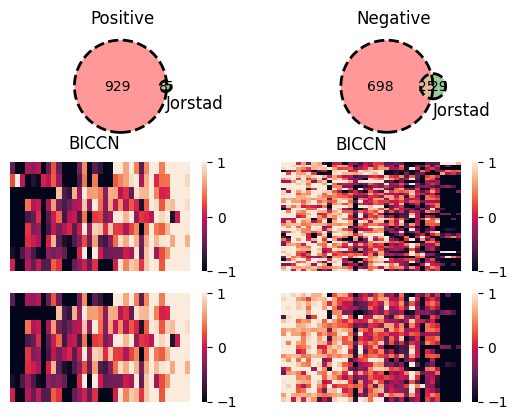

In [8]:
subclass = "L2_3_IT"
subclass_column = "L2_3_IT"
corr_positive_list = pd.read_csv(
    "corr_genes/{}_positive.tsv".format(subclass), sep="\t", header=None)[0].to_list()
jorstad_positive_list = jorstad_corr_genes[
    (jorstad_corr_genes["subclass"] == subclass_column) & (jorstad_corr_genes["cor_ap"] > 0)
]["gene"].to_list()
corr_negative_list = pd.read_csv(
    "corr_genes/{}_negative.tsv".format(subclass), sep="\t", header=None)[0].to_list()
jorstad_negative_list = jorstad_corr_genes[
    (jorstad_corr_genes["subclass"] == subclass_column) & (jorstad_corr_genes["cor_ap"] < 0)
]["gene"].to_list()

fig, axs = plt.subplots(3, 2)
venn2(
    (set(corr_positive_list), set(jorstad_positive_list)),
    set_labels=["BICCN", "Jorstad"],
    ax=axs[0, 0]
)
venn2_circles(
    (set(corr_positive_list), set(jorstad_positive_list)),
    linestyle="dashed",
    linewidth=2,
    color="black",
    ax=axs[0, 0]
)
axs[0, 0].set_title("Positive");
venn2(
    (set(corr_negative_list), set(jorstad_negative_list)),
    set_labels=["BICCN", "Jorstad"],
    ax=axs[0, 1]
)
venn2_circles(
    (set(corr_negative_list), set(jorstad_negative_list)),
    linestyle="dashed",
    linewidth=2,
    color="black",
    ax=axs[0, 1]
)
axs[0, 1].set_title("Negative");

rna_counts = sc.read_h5ad("{}_rna_matrix.h5ad".format(subclass))
# rna_counts = rna_counts.raw.to_adata()
rna_counts.obs["Donor_Region"] = \
        rna_counts.obs["PatientID"].astype("str") + "_" + rna_counts.obs["Region"].astype("str")
rna_region_counts = dc.get_pseudobulk(
    adata=rna_counts,
    sample_col="Donor_Region",
    groups_col=None,
    min_cells=0,
    min_counts=0,
    min_prop=0.0,
    min_smpls=0,
    remove_empty=True,
    mode="sum"
)
sc.pp.normalize_total(rna_region_counts, target_sum=1e6)
sc.pp.log1p(rna_region_counts, base=2)
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
rna_region_counts.obs["Region"] = pd.Categorical(
    rna_region_counts.obs["Region"], categories=region_align
)
sorted_index = rna_region_counts.obs.sort_values(by="Region").index

jorstad_positive_filterd = list(
    set(jorstad_positive_list) & set(rna_region_counts.var.index.to_list())
)
plot_matrix = rna_region_counts[sorted_index, jorstad_positive_filterd].X.T
row_mean = np.mean(plot_matrix, axis=1, keepdims=True)
row_std = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_mean) / row_std
sns.heatmap(
    plot_matrix_z,
    xticklabels=[],
    yticklabels=[],
    vmin=-1,
    vmax=1,
    ax=axs[1, 0]
)

jorstad_positive_filterd = list(
    set(jorstad_positive_list) & set(corr_positive_list)
)
plot_matrix = rna_region_counts[sorted_index, jorstad_positive_filterd].X.T
row_mean = np.mean(plot_matrix, axis=1, keepdims=True)
row_std = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_mean) / row_std
sns.heatmap(
    plot_matrix_z,
    xticklabels=[],
    yticklabels=[],
    vmin=-1,
    vmax=1,
    ax=axs[2, 0]
)

jorstad_negative_filterd = list(
    set(jorstad_negative_list) & set(rna_region_counts.var.index.to_list())
)
plot_matrix = rna_region_counts[sorted_index, jorstad_negative_filterd].X.T
row_mean = np.mean(plot_matrix, axis=1, keepdims=True)
row_std = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_mean) / row_std
sns.heatmap(
    plot_matrix_z,
    xticklabels=[],
    yticklabels=[],
    vmin=-1,
    vmax=1,
    ax=axs[1, 1]
)

jorstad_negative_filterd = list(
    set(jorstad_negative_list) & set(corr_negative_list)
)
plot_matrix = rna_region_counts[sorted_index, jorstad_negative_filterd].X.T
row_mean = np.mean(plot_matrix, axis=1, keepdims=True)
row_std = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_mean) / row_std
sns.heatmap(
    plot_matrix_z,
    xticklabels=[],
    yticklabels=[],
    vmin=-1,
    vmax=1,
    ax=axs[2, 1]
)

# Old Approach (|corr| > 0.7, padjusted < 0.05)

In [1]:
# let's solve it all at once
import os
from pathlib import Path
import matplotlib.pyplot as plt
root_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir(root_dir / "other_celltypes")

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import scanpy as sc
import decoupler as dc
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [3]:
celltype_names = []
positive_nbr = []
negative_nbr = []
for file in Path("./").glob("*rna_matrix.mtx"):
    celltype = str(file).split("_rna_matrix", 1)[0]
    print(celltype)
    celltype_names.append(celltype)
    
    # rna_counts = sc.read_mtx("{}_rna_matrix.mtx".format(celltype))
    # rna_counts = rna_counts.T.copy()
    # cell_meta = pd.read_csv("{}_meta_data.tsv".format(celltype), header=0, index_col=0, sep="\t")
    # gene_names = pd.read_csv("{}_gene_names.tsv".format(celltype), header=None, index_col=0, sep="\t")
    # gene_names.index.name = None
    # rna_counts.obs = cell_meta
    # rna_counts.var = gene_names
    # rna_counts.write("{}_rna_matrix.h5ad".format(celltype))

    rna_counts = sc.read_h5ad("{}_rna_matrix.h5ad".format(celltype))
    if celltype in ["L4_IT","SST_CHODL", "L5_ET"]:
        rna_counts = rna_counts.raw.to_adata().copy()
    rna_counts.obs["Donor_Region"] = \
        rna_counts.obs["PatientID"].astype("str") + "_" + rna_counts.obs["Region"].astype("str")
    rna_region_counts = dc.get_pseudobulk(
        adata=rna_counts,
        sample_col="Donor_Region",
        groups_col=None,
        min_cells=0,
        min_counts=0,
        min_prop=0.0,
        min_smpls=0,
        remove_empty=True,
        mode="sum"
    )
    sc.pp.normalize_total(rna_region_counts, target_sum=1e6)
    sc.pp.log1p(rna_region_counts, base=2)
    
    region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
    rna_region_counts.obs["Region"] = pd.Categorical(
        rna_region_counts.obs["Region"], categories=region_align
    )
    sorted_index = rna_region_counts.obs.sort_values(by="Region").index
    b = rna_region_counts.obs.loc[sorted_index, "Region"].cat.codes.to_list()
    data_matrix = rna_region_counts[sorted_index, :].X
    corrs = np.zeros(data_matrix.shape[1])
    pvalues = np.zeros(data_matrix.shape[1])
    
    for i in range(0, data_matrix.shape[1]):
        a = data_matrix[:, i]
        corr, pvalue = stats.spearmanr(a, b)
        corrs[i] = corr
        pvalues[i] = pvalue
    padjusted = stats.false_discovery_control(pvalues, method="bh")
    spearman_result = pd.DataFrame({
        "gene": rna_region_counts.var.index.to_list(),
        "corr": corrs,
        "p_value": pvalues,
        "p_adjusted": padjusted,
    })

    spearman_result.to_csv("corr_genes_7e-1_5e-2/{}_RC_table.tsv".format(celltype), sep="\t", header=True, index=False)

    pos_genes = spearman_result[
        (spearman_result["p_adjusted"] < 0.05) &
        (spearman_result["corr"] > 0.7)
    ]["gene"].to_list()
    positive_nbr.append(len(pos_genes))
    with open("corr_genes_7e-1_5e-2/{}_positive.tsv".format(celltype), "w") as fout:
        for gene in pos_genes:
            fout.write("{}\n".format(gene))

    neg_genes = spearman_result[
        (spearman_result["p_adjusted"] < 0.05) &
        (spearman_result["corr"] < -0.7)
    ]["gene"].to_list()
    negative_nbr.append(len(neg_genes))
    with open("corr_genes_7e-1_5e-2/{}_negative.tsv".format(celltype), "w") as fout:
        for gene in neg_genes:
            fout.write("{}\n".format(gene))

Micro


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L5_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6_IT_Car3


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


LAMP5_LHX6


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


OPC


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6B


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6_CT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


VLMC


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Oligo


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


PAX6


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Chandelier


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L2_3_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


SST_CHODL


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Astro


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


SST


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


LAMP5


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


PVALB


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Endo


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


SNCG


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L5_ET


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


VIP


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L5_6_NP


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L4_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [4]:
plot_table_wide = pd.DataFrame({
    "celltype": celltype_names,
    "positive": positive_nbr,
    "negative": negative_nbr
})

In [5]:
plot_table_wide.to_csv(
    "summary_tables/rostral_caudal_corr_genes_all_celltypes_7e-1_5e-2.tsv",
    header=True, index=False, sep="\t"
)

In [6]:
plot_table_wide = pd.read_csv(
    "summary_tables/rostral_caudal_corr_genes_all_celltypes_7e-1_5e-2.tsv",
    header=0, sep="\t"
)

In [7]:
plot_table_wide["total"] = plot_table_wide["positive"] + plot_table_wide["negative"]
sorted_index = plot_table_wide.sort_values("total", ascending=False)["celltype"]
plot_table_wide["celltype"] = pd.Categorical(plot_table_wide["celltype"], categories=sorted_index)
plot_table_long = pd.melt(
    plot_table_wide, 
    id_vars=["celltype"], 
    value_vars=["positive", "negative"],
    var_name="direction",
    value_name="corr_score"
)

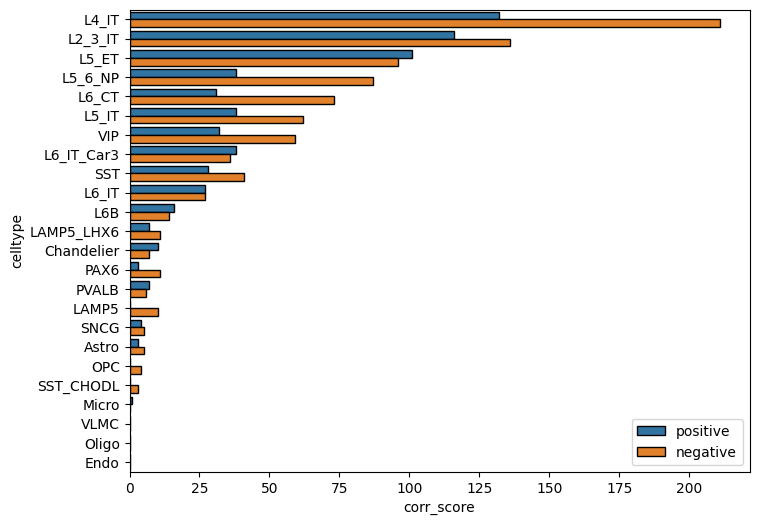

In [8]:
plot_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/analysis/scenicplus/L4_IT/figures/")
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8),
fig.set_figheight(6)
sns.barplot(
    plot_table_long, 
    y="celltype", 
    x="corr_score", 
    hue="direction", 
    ax=ax, 
    linewidth=1,
    edgecolor="black"
)
plt.legend(loc="lower right")
fig.savefig(plot_dir / "rostral_caudal_all_corr_genes_7e-1_5e-2.png", dpi=300, format="png")

### Upset plot for corr genes

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
root_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir(root_dir / "other_celltypes")
plot_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/analysis/scenicplus/L4_IT/figures/")

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import scanpy as sc
import decoupler as dc
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [3]:
import itertools

In [4]:
def generate_all_combinations_and_counts(lists):
    combination_codes = []
    number_instances = []

    N = len(lists)
    for k in range(2, N+1):
        for combinations in itertools.combinations(range(N), k):
            combination_codes.append(combinations)
            intersected = set(lists[combinations[0]])
            for idx in combinations[1:]:
                intersected &= set(lists[idx])
            number_instances.append(len(intersected))

    return (combination_codes, number_instances)

In [5]:
celltype_order = []
lists = []
for file in Path("./corr_genes_7e-1_5e-2/").glob("*_positive.tsv"):
    celltype = file.name.split("_positive.tsv")[0]
    if file.stat().st_size <= 0:
        continue
    celltype_order.append(celltype)
    curr_df = pd.read_csv(file, header=None, sep="\t")
    lists.append(curr_df[0].to_list())
lists_len = [len(li) for li in lists]
lists_len_sorted = np.sort(lists_len)[::-1]
lists_len_sorted_index = np.argsort(lists_len)[::-1]
celltype_sorted = [celltype_order[ii] for ii in lists_len_sorted_index]
lists_sorted = [lists[ii] for ii in lists_len_sorted_index]
combination_codes, number_instances = generate_all_combinations_and_counts(lists_sorted)
number_instances_sorted = np.sort(number_instances)[::-1]
number_instances_sorted_index = np.argsort(number_instances)[::-1]
combination_codes_sorted = [combination_codes[ii] for ii in number_instances_sorted_index]

In [6]:
N = 20
K = len(celltype_sorted)

In [7]:
unique_elements = []
sets = [set(li) for li in lists_sorted]
for i, curr_set in enumerate(sets):
    other_sets_union = set.union(*(sets[:i] + sets[(i+1):]))
    unique_to_curr = curr_set - other_sets_union
    unique_elements.append(list(unique_to_curr))
number_unique_elements = [len(ue) for ue in unique_elements]
number_instances_final = number_unique_elements + list(number_instances_sorted[0:N])
cc_header = [(i,) for i in range(0, K)]
cc_final = cc_header + combination_codes_sorted[0:N]

In [8]:
import matplotlib.gridspec as gridspec

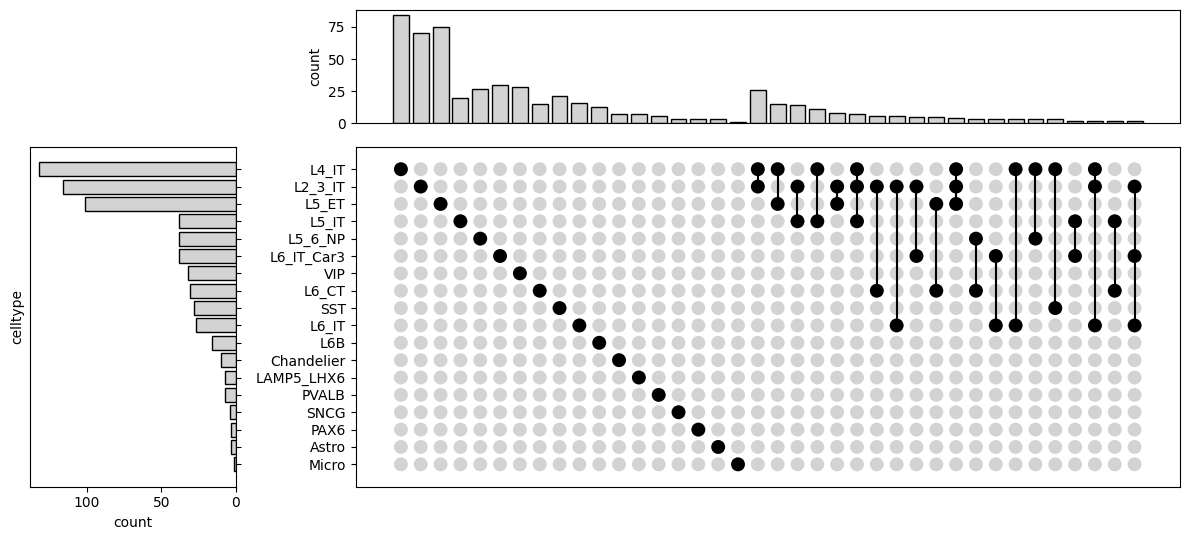

In [10]:
Nx = len(cc_final)
fig = plt.figure(figsize=(12, 5.5))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 3], width_ratios=[1, 4])

ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1], sharey=ax1, sharex=ax2)

df_1 = pd.DataFrame({
    "celltype": celltype_sorted,
    "count": lists_len_sorted
})
sns.barplot(
    df_1,
    x="count",
    y="celltype",
    orient="h",
    ax=ax1,
    edgecolor="black",
    facecolor="lightgrey"
)
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.tick_params(labelright=False);

df_2 = pd.DataFrame({
    "count": number_instances_final
})
df_2.reset_index(inplace=True)
sns.barplot(
    df_2,
    x="index",
    y="count",
    ax=ax2,
    edgecolor="black",
    facecolor="lightgrey"
)
ax2.xaxis.set_ticks([]);
ax2.set_xticklabels([]);
ax2.set_xlabel("");

for i in range(Nx):
    ax3.scatter([i] * (K), np.arange(K), color="lightgrey", s=100, edgecolor="none")
points_by_x = {x: [] for x in range(Nx)}
for i, tuple_vals in enumerate(cc_final):
    ax3.scatter([i] * len(tuple_vals), tuple_vals, color="black", s=100, edgecolor="none")
    for x in tuple_vals:
        points_by_x[i].append(x)
for x, yvals in points_by_x.items():
    ax3.plot([x] * len(yvals), yvals, color="black", lw=1.5)
    
ax3.xaxis.set_ticks([]);
ax3.set_xticklabels([]);
ax3.set_xlabel("");
# ax3.yaxis.set_ticks(np.arange(0, K));
# ax3.invert_yaxis()
plt.tight_layout()
fig.savefig(plot_dir / "rostral_caudal_all_corr_genes_7e-1_5e-2_positive_upset.png", dpi=300, format="png")

In [11]:
celltype_order = []
lists = []
for file in Path("./corr_genes_7e-1_5e-2/").glob("*_negative.tsv"):
    celltype = file.name.split("_negative.tsv")[0]
    if file.stat().st_size <= 0:
        continue
    celltype_order.append(celltype)
    curr_df = pd.read_csv(file, header=None, sep="\t")
    lists.append(curr_df[0].to_list())
lists_len = [len(li) for li in lists]
lists_len_sorted = np.sort(lists_len)[::-1]
lists_len_sorted_index = np.argsort(lists_len)[::-1]
celltype_sorted = [celltype_order[ii] for ii in lists_len_sorted_index]
lists_sorted = [lists[ii] for ii in lists_len_sorted_index]
combination_codes, number_instances = generate_all_combinations_and_counts(lists_sorted)
number_instances_sorted = np.sort(number_instances)[::-1]
number_instances_sorted_index = np.argsort(number_instances)[::-1]
combination_codes_sorted = [combination_codes[ii] for ii in number_instances_sorted_index]

In [12]:
N = 20
K = len(celltype_sorted)

In [13]:
unique_elements = []
sets = [set(li) for li in lists_sorted]
for i, curr_set in enumerate(sets):
    other_sets_union = set.union(*(sets[:i] + sets[(i+1):]))
    unique_to_curr = curr_set - other_sets_union
    unique_elements.append(list(unique_to_curr))
number_unique_elements = [len(ue) for ue in unique_elements]
number_instances_final = number_unique_elements + list(number_instances_sorted[0:N])
cc_header = [(i,) for i in range(0, K)]
cc_final = cc_header + combination_codes_sorted[0:N]

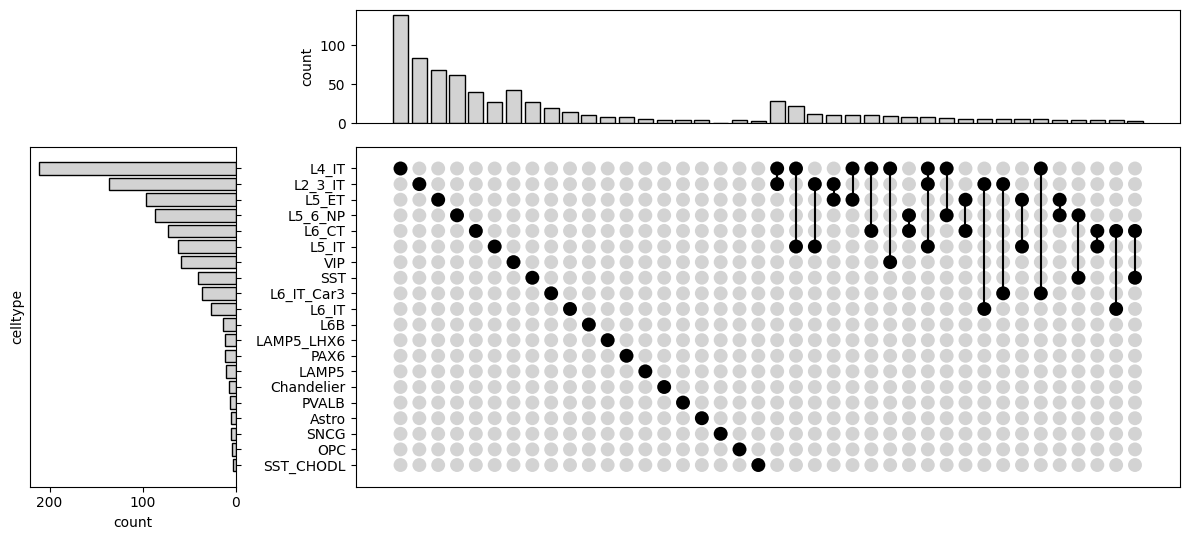

In [14]:
Nx = len(cc_final)
fig = plt.figure(figsize=(12, 5.5))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 3], width_ratios=[1, 4])

ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1], sharey=ax1, sharex=ax2)

df_1 = pd.DataFrame({
    "celltype": celltype_sorted,
    "count": lists_len_sorted
})
sns.barplot(
    df_1,
    x="count",
    y="celltype",
    orient="h",
    ax=ax1,
    edgecolor="black",
    facecolor="lightgrey"
)
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.tick_params(labelright=False);

df_2 = pd.DataFrame({
    "count": number_instances_final
})
df_2.reset_index(inplace=True)
sns.barplot(
    df_2,
    x="index",
    y="count",
    ax=ax2,
    edgecolor="black",
    facecolor="lightgrey"
)
ax2.xaxis.set_ticks([]);
ax2.set_xticklabels([]);
ax2.set_xlabel("");

for i in range(Nx):
    ax3.scatter([i] * (K), np.arange(K), color="lightgrey", s=100, edgecolor="none")
points_by_x = {x: [] for x in range(Nx)}
for i, tuple_vals in enumerate(cc_final):
    ax3.scatter([i] * len(tuple_vals), tuple_vals, color="black", s=100, edgecolor="none")
    for x in tuple_vals:
        points_by_x[i].append(x)
for x, yvals in points_by_x.items():
    ax3.plot([x] * len(yvals), yvals, color="black", lw=1.5)
    
ax3.xaxis.set_ticks([]);
ax3.set_xticklabels([]);
ax3.set_xlabel("");
# ax3.yaxis.set_ticks(np.arange(0, K));
# ax3.invert_yaxis()
plt.tight_layout()
fig.savefig(plot_dir / "rostral_caudal_all_corr_genes_7e-1_5e-2_negative_upset.png", dpi=300, format="png")

### Plot corr scores of corr genes in Jorstad paper

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
root_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir(root_dir / "other_celltypes")
plot_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/analysis/scenicplus/L4_IT/figures/")

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import scanpy as sc
import decoupler as dc
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [3]:
jorstad_corr_genes = pd.read_csv("jorstad_rc_corr_genes.csv", sep=",", header=0)

In [4]:
jorstad_corr_genes["subclass"] = \
    jorstad_corr_genes["subclass"].str.replace("[/ ]", "_", regex=True)

In [5]:
all_dfs = []
for subclass in jorstad_corr_genes["subclass"].unique():
    if subclass in ["L6b", "Pvalb", "Sst", "Sst_Chodl", "Lamp5_Lhx6", "Sncg", "Vip"]:
        subclass = subclass.upper()
    subclass_df = jorstad_corr_genes[jorstad_corr_genes["subclass"] == subclass]
    filename = "corr_genes_7e-1_5e-2/{}_RC_table.tsv".format(subclass)
    if not Path(filename).exists():
        print(subclass, filename)
        continue
    rc_df = pd.read_csv(filename, sep="\t", header=0, index_col=None)

    gene_list_p = subclass_df[subclass_df["cor_ap"] > 0]["gene"].to_list()
    df_p = rc_df[rc_df["gene"].isin(gene_list_p)]
    df_p["direction"] = "positive"
    df_p["subclass"] = subclass

    gene_list_n = subclass_df[subclass_df["cor_ap"] < 0]["gene"].to_list()
    df_n = rc_df[rc_df["gene"].isin(gene_list_n)]
    df_n["direction"] = "negative"
    df_n["subclass"] = subclass

    if df_p.shape[0] <= 0 or df_n.shape[0] <= 0:
        continue

    curr_df = pd.concat([df_p, df_n], axis=0)
    all_dfs.append(curr_df)

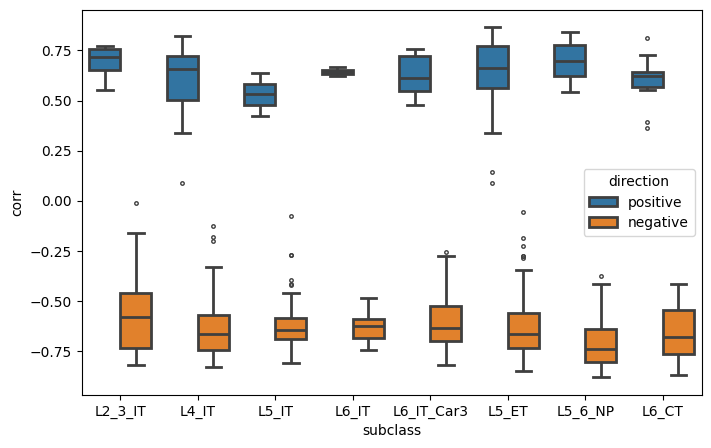

In [6]:
plot_df = pd.concat(all_dfs, axis=0)
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(5)
sns.boxplot(
    plot_df,
    x="subclass",
    y="corr",
    hue="direction",
    linewidth=2,
    fliersize=2.5,
    ax=ax
)
fig.savefig(plot_dir / "rostral_caudal_jorstad_genes_corr_scores.png", dpi=300, format="png")

# New perspective: Sensorimotor Transmodal axis

In [1]:
# let's solve it all at once
import os
from pathlib import Path
import matplotlib.pyplot as plt
root_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir(root_dir / "other_celltypes")

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import scanpy as sc
import decoupler as dc
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [3]:
celltype_names = []
positive_nbr = []
negative_nbr = []
for file in Path("./").glob("*rna_matrix.mtx"):
    celltype = str(file).split("_rna_matrix", 1)[0]
    print(celltype)
    celltype_names.append(celltype)
    
    # rna_counts = sc.read_mtx("{}_rna_matrix.mtx".format(celltype))
    # rna_counts = rna_counts.T.copy()
    # cell_meta = pd.read_csv("{}_meta_data.tsv".format(celltype), header=0, index_col=0, sep="\t")
    # gene_names = pd.read_csv("{}_gene_names.tsv".format(celltype), header=None, index_col=0, sep="\t")
    # gene_names.index.name = None
    # rna_counts.obs = cell_meta
    # rna_counts.var = gene_names
    # rna_counts.write("{}_rna_matrix.h5ad".format(celltype))

    rna_counts = sc.read_h5ad("{}_rna_matrix.h5ad".format(celltype))
    if celltype in ["L4_IT","SST_CHODL", "L5_ET"]:
        rna_counts = rna_counts.raw.to_adata().copy()
    rna_counts.obs["Donor_Region"] = \
        rna_counts.obs["PatientID"].astype("str") + "_" + rna_counts.obs["Region"].astype("str")
    rna_region_counts = dc.get_pseudobulk(
        adata=rna_counts,
        sample_col="Donor_Region",
        groups_col=None,
        min_cells=0,
        min_counts=0,
        min_prop=0.0,
        min_smpls=0,
        remove_empty=True,
        mode="sum"
    )
    sc.pp.normalize_total(rna_region_counts, target_sum=1e6)
    sc.pp.log1p(rna_region_counts, base=2)
    
    region_align = ["A24", "A9", "FI", "MTG", "AnG", "M1C", "S1C", "A1C", "V1C"]
    rna_region_counts.obs["Region"] = pd.Categorical(
        rna_region_counts.obs["Region"], categories=region_align
    )
    sorted_index = rna_region_counts.obs.sort_values(by="Region").index
    b = rna_region_counts.obs.loc[sorted_index, "Region"].cat.codes.to_list()
    data_matrix = rna_region_counts[sorted_index, :].X
    corrs = np.zeros(data_matrix.shape[1])
    pvalues = np.zeros(data_matrix.shape[1])
    
    for i in range(0, data_matrix.shape[1]):
        a = data_matrix[:, i]
        corr, pvalue = stats.spearmanr(a, b)
        corrs[i] = corr
        pvalues[i] = pvalue
    padjusted = stats.false_discovery_control(pvalues, method="bh")
    spearman_result = pd.DataFrame({
        "gene": rna_region_counts.var.index.to_list(),
        "corr": corrs,
        "p_value": pvalues,
        "p_adjusted": padjusted,
    })

    spearman_result.to_csv("corr_genes_ST_7e-1_5e-2/{}_RC_table.tsv".format(celltype), sep="\t", header=True, index=False)

    pos_genes = spearman_result[
        (spearman_result["p_adjusted"] < 0.05) &
        (spearman_result["corr"] > 0.7)
    ]["gene"].to_list()
    positive_nbr.append(len(pos_genes))
    with open("corr_genes_ST_7e-1_5e-2/{}_positive.tsv".format(celltype), "w") as fout:
        for gene in pos_genes:
            fout.write("{}\n".format(gene))

    neg_genes = spearman_result[
        (spearman_result["p_adjusted"] < 0.05) &
        (spearman_result["corr"] < -0.7)
    ]["gene"].to_list()
    negative_nbr.append(len(neg_genes))
    with open("corr_genes_ST_7e-1_5e-2/{}_negative.tsv".format(celltype), "w") as fout:
        for gene in neg_genes:
            fout.write("{}\n".format(gene))

Micro


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L5_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6_IT_Car3


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


LAMP5_LHX6


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


OPC


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6B


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L6_CT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


VLMC


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Oligo


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


PAX6


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Chandelier


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L2_3_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


SST_CHODL


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Astro


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


SST


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


LAMP5


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


PVALB


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Endo


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


SNCG


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L5_ET


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


VIP


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L5_6_NP


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


L4_IT


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [4]:
plot_table_wide = pd.DataFrame({
    "celltype": celltype_names,
    "positive": positive_nbr,
    "negative": negative_nbr
})

In [5]:
plot_table_wide.to_csv(
    "summary_tables/ST_corr_genes_all_celltypes_7e-1_5e-2.tsv",
    header=True, index=False, sep="\t"
)

In [6]:
plot_table_wide = pd.read_csv(
    "summary_tables/ST_corr_genes_all_celltypes_7e-1_5e-2.tsv",
    header=0, sep="\t"
)

In [7]:
plot_table_wide["total"] = plot_table_wide["positive"] + plot_table_wide["negative"]
sorted_index = plot_table_wide.sort_values("total", ascending=False)["celltype"]
plot_table_wide["celltype"] = pd.Categorical(plot_table_wide["celltype"], categories=sorted_index)
plot_table_long = pd.melt(
    plot_table_wide, 
    id_vars=["celltype"], 
    value_vars=["positive", "negative"],
    var_name="direction",
    value_name="corr_score"
)

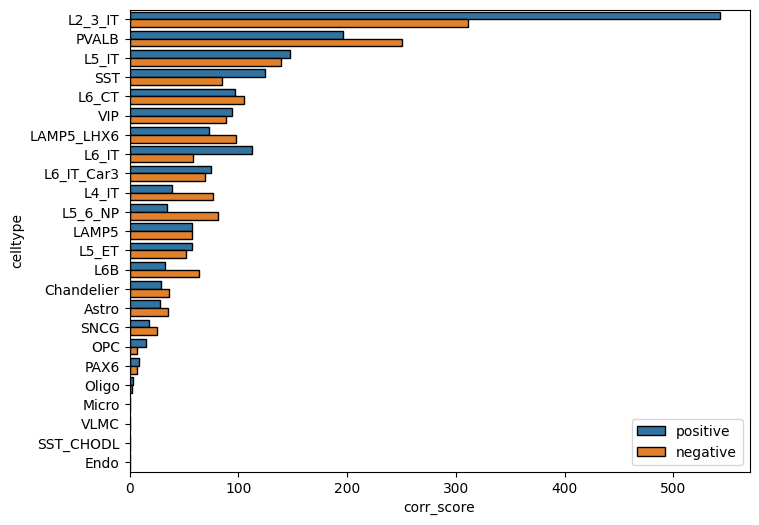

In [8]:
plot_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/analysis/scenicplus/L4_IT/figures/")
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8),
fig.set_figheight(6)
sns.barplot(
    plot_table_long, 
    y="celltype", 
    x="corr_score", 
    hue="direction", 
    ax=ax, 
    linewidth=1,
    edgecolor="black"
)
plt.legend(loc="lower right")
fig.savefig(plot_dir / "ST_all_corr_genes_7e-1_5e-2.png", dpi=300, format="png")